# Do the Golden States Warriors perform better at home?

## Fist the libraries

In [1]:
!pip install nba_api

import pandas as pd
import json
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.static import teams
import matplotlib.pyplot as plt
import numpy as np

## Then we get the team id

In [2]:
df_teams = teams.get_teams()
df_teams = pd.DataFrame(df_teams)
df_warriors=df_teams[df_teams['nickname']=='Warriors']
print(df_warriors)

  abbreviation          city              full_name          id  nickname  \
7          GSW  Golden State  Golden State Warriors  1610612744  Warriors   

        state  year_founded  
7  California          1946  


In [3]:
id_Warriors = int(df_warriors["id"])
id_Warriors

1610612744

## We proced to ask for the information of the team

In [4]:
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_Warriors)
the_info=gamefinder.get_json()

## For the next step we convert the json to a Data Frame

In [5]:
dct=json.loads(the_info)
dct.keys()

dict_keys(['resource', 'parameters', 'resultSets'])

### I have to know what types are inside dct[0]

In [6]:
dct=dct["resultSets"]
print(type(dct[0]))

<class 'dict'>


In [7]:
dct=dct[0]

## The information is not in shape to cast into Data Frame so...

In [8]:
w=[]
fdf={}
for head in range(len(dct["headers"])):
    for things in range(len(dct["rowSet"])):
        w.append(dct["rowSet"][things][head])
    fdf[dct["headers"][head]]=w
    w=[]
print(fdf)

{'SEASON_ID': ['22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '12019', '12019', '12019', '12019', '12019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '22019', '42018', '42018', '42018', '42018', '42018', '42018', '42018', '42018', '42018', '42018', '42018', '42018', '42018', '42018', '42018', '42018', '42018', '42018', '42018', '42018', '42018', '42018', '22018', '22018', '22018', '22018', '22018', '22018', '22018', '22018', '22018', '22018', '22018', '22018', '22018', '22018', '22018', '22018', '22018', '22018', '22018', '22018', '22018', '22018', '22018', '22018', '220

In [10]:
df = pd.DataFrame(fdf)
df.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,0021900730,2020-02-01,GSW @ CLE,W,242,131,...,0.895,10.0,34.0,44.0,39,11,10,11,16,19.0
1,22019,1610612744,GSW,Golden State Warriors,0021900717,2020-01-30,GSW @ BOS,L,239,104,...,0.867,3.0,27.0,30.0,24,11,6,16,19,-15.0
2,22019,1610612744,GSW,Golden State Warriors,0021900702,2020-01-28,GSW @ PHI,L,239,104,...,0.714,6.0,34.0,40.0,29,6,3,13,24,-11.0
3,22019,1610612744,GSW,Golden State Warriors,0021900679,2020-01-24,GSW vs. IND,L,241,118,...,0.826,7.0,31.0,38.0,31,6,3,20,16,-11.0
4,22019,1610612744,GSW,Golden State Warriors,0021900665,2020-01-22,GSW vs. UTA,L,241,96,...,0.833,11.0,26.0,37.0,20,5,5,8,23,-33.0


In [12]:
games_home=df [df ['MATCHUP']=='GSW vs. TOR']
games_away=df [df ['MATCHUP']=='GSW @ TOR']

### "vs" means games home and "@" means games out

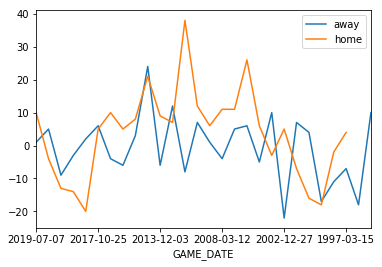

In [13]:
fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()

## Under 0 scores means they lost by that many points  
  # They play better at home